In [1]:
!pip install xgboost

In [2]:
#  import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read data
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
# check for descriptive statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# check for null values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [7]:
df['gender'].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [8]:
# check duplicate values
print(df.duplicated().sum())
# remove duplicate values
df = df.drop_duplicates()
print("______Removed Duplicate______")
print(df.duplicated().sum())

3854
______Removed Duplicate______
0


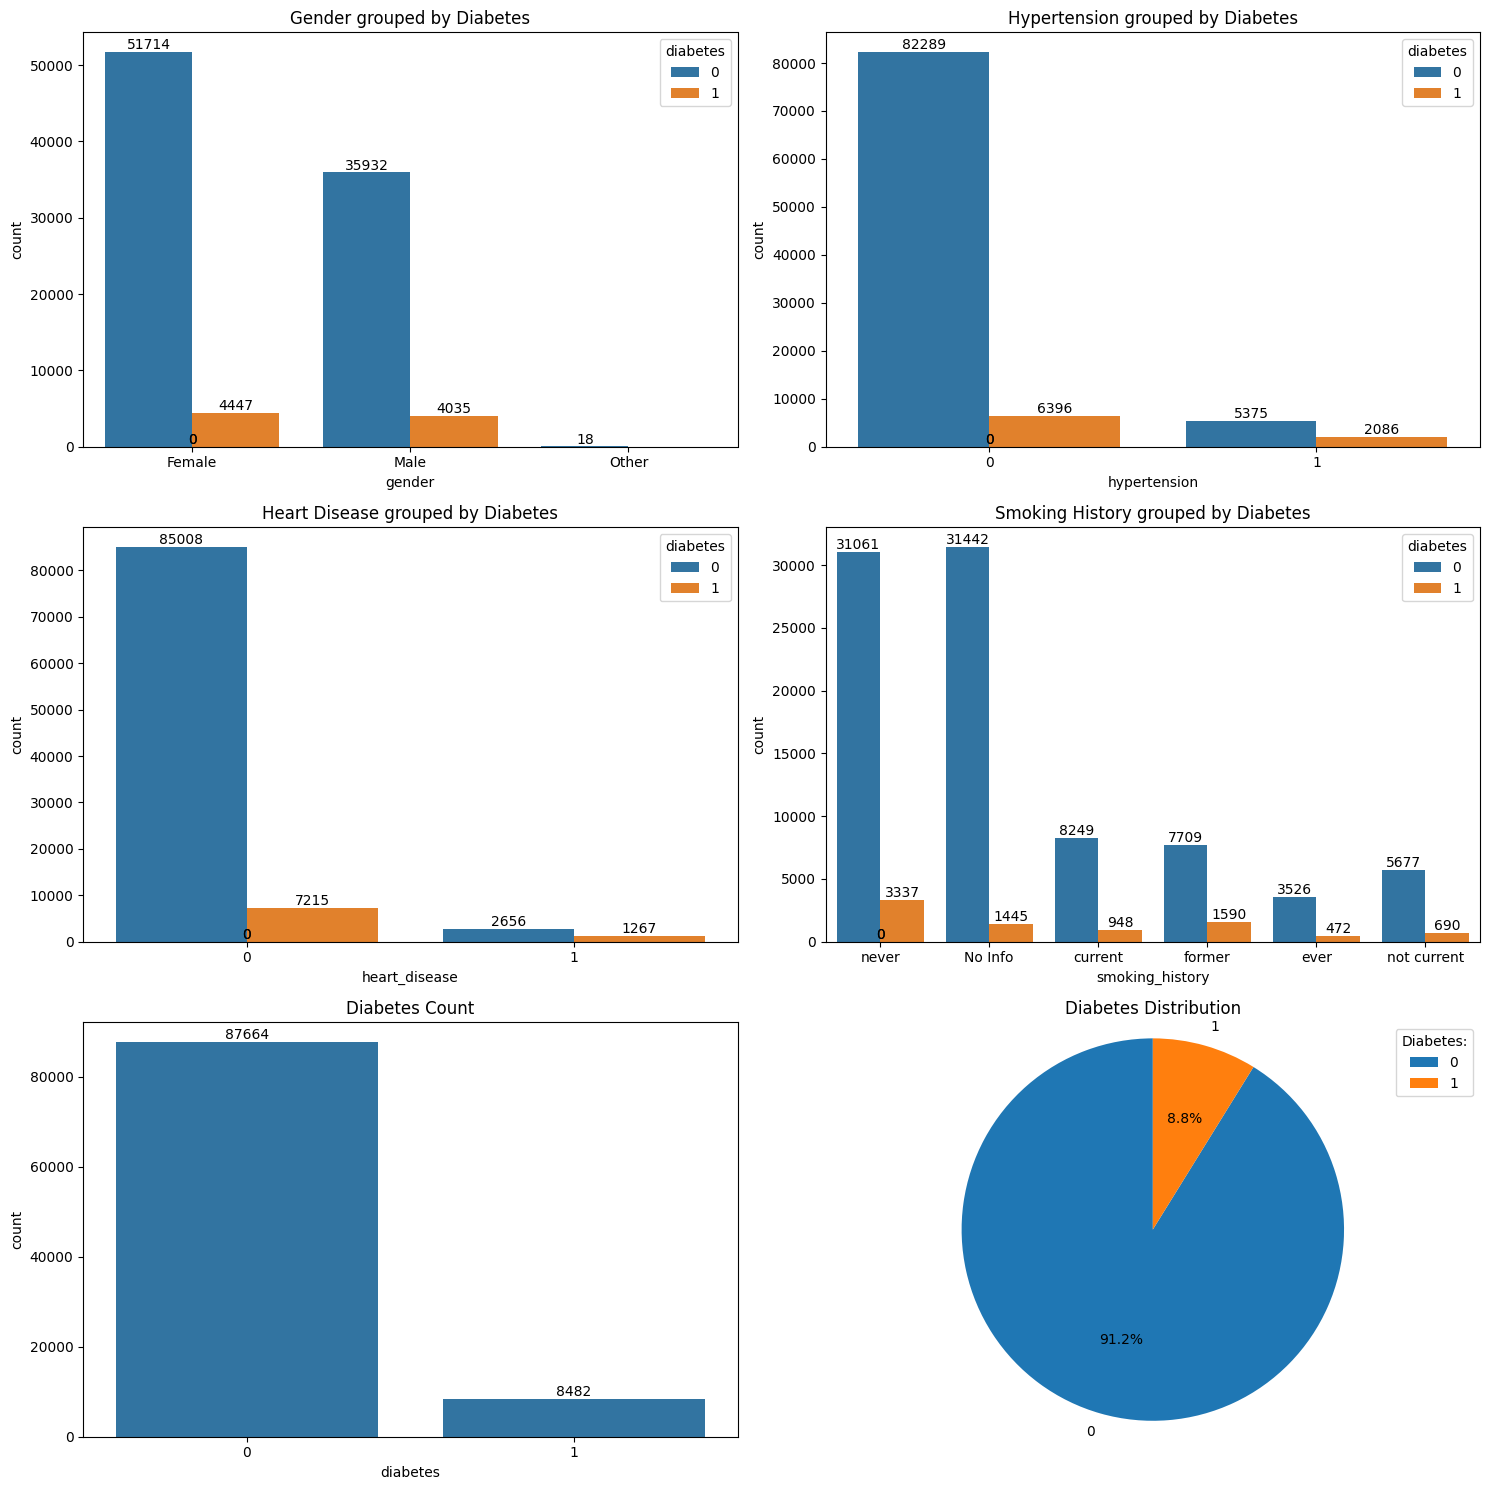

In [9]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

# Create pie plot for diabetes
diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Minimum age: 0.08
Maximum age: 80.0
Average age: 41.79432571297817
Diabetes Counts:
diabetes
0    87664
1     8482
Name: count, dtype: int64
Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0


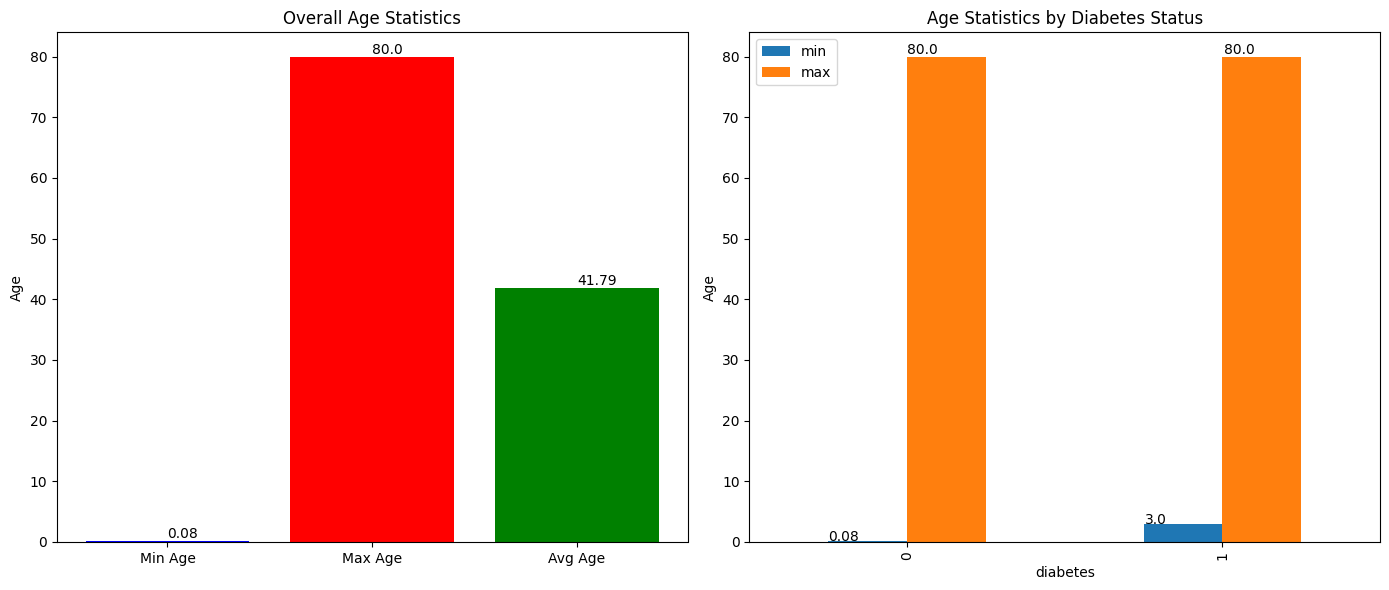

In [10]:
# Calculate minimum, maximum, and average age
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['diabetes'].value_counts()

# Group by diabetes status and calculate min and max ages
grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("Diabetes Counts:")
print(diabetes_counts)
print("Age Statistics by Diabetes Status:")
print(grouped_ages)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for overall min, max, and average age
bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['blue', 'red', 'green'])
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Add text to the top of the bars

# Plot for min and max ages grouped by diabetes status
grouped_bars = grouped_ages.plot(kind='bar', ax=ax[1])
ax[1].set_title('Age Statistics by Diabetes Status')
ax[1].set_ylabel('Age')

# Annotate bars with their values
for p in grouped_bars.patches:
    grouped_bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()

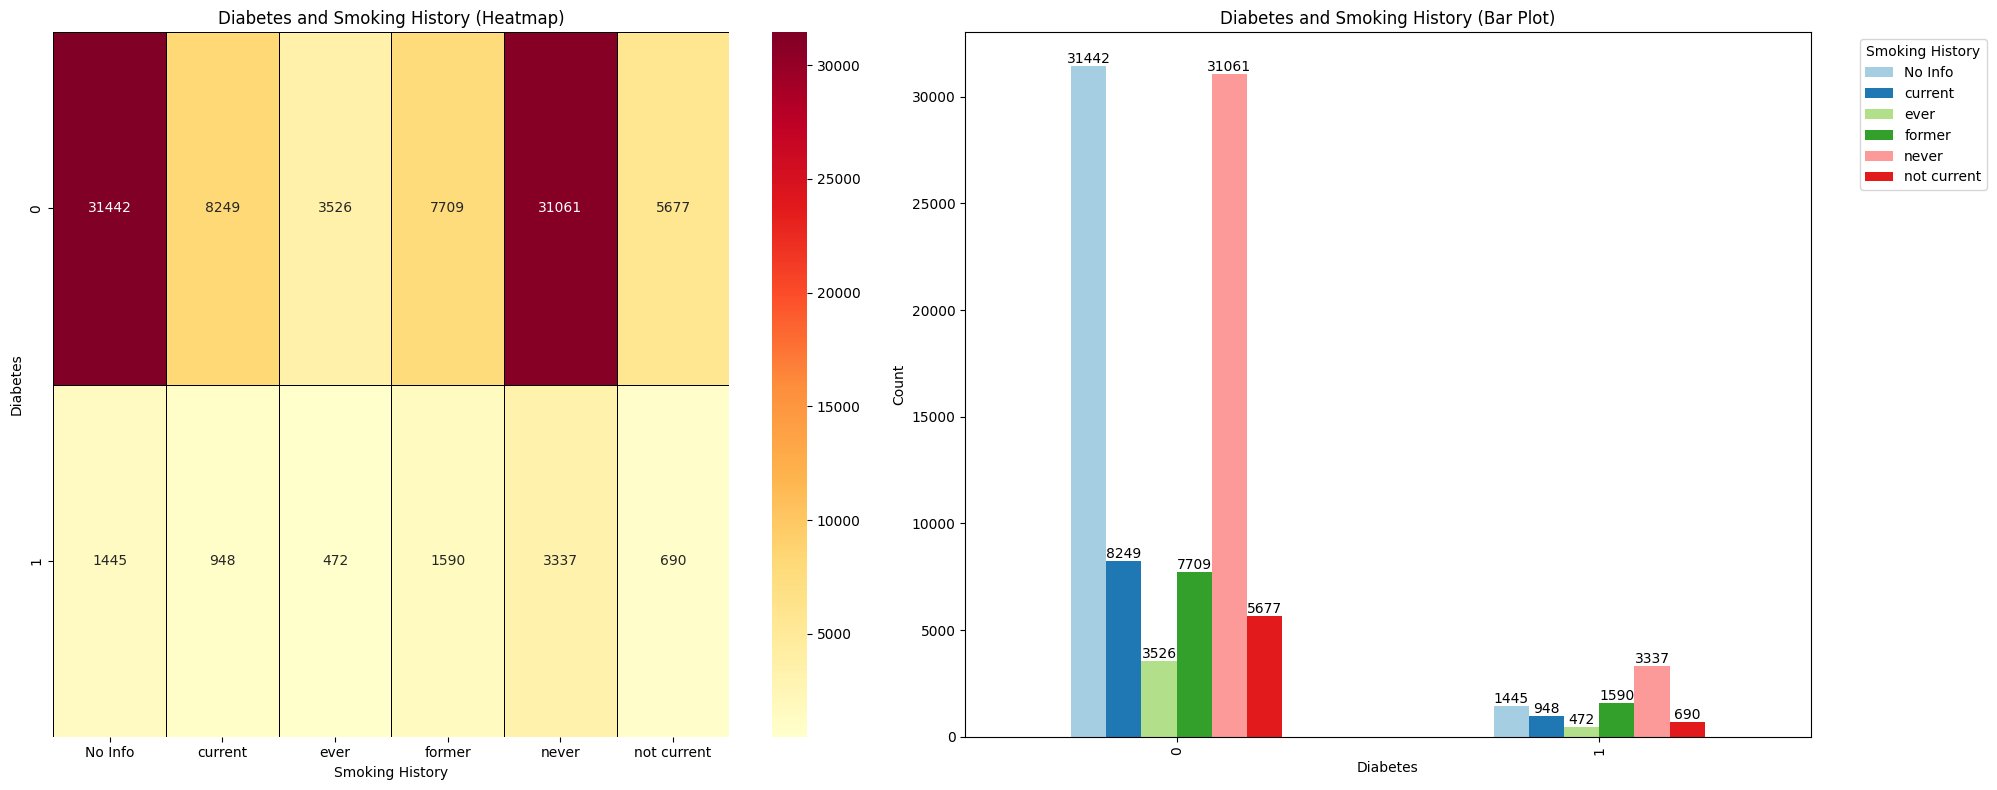

In [11]:
cross_table = pd.crosstab(df['diabetes'], df['smoking_history'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the cross table as a heatmap
sns.heatmap(cross_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, linecolor='black', ax=ax[0])
ax[0].set_title('Diabetes and Smoking History (Heatmap)')
ax[0].set_xlabel('Smoking History')
ax[0].set_ylabel('Diabetes')

# Plotting the cross table with separate bars for smoking history
cross_table.plot(kind='bar', stacked=False, ax=ax[1], color=plt.cm.Paired.colors)
ax[1].set_title('Diabetes and Smoking History (Bar Plot)')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Count')
ax[1].legend(title='Smoking History', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with their values
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.tight_layout()
plt.show()

In [12]:
# incode the data
from sklearn.preprocessing import LabelEncoder

# 创建并存储每列的编码器
encoders = {}
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # 存入字典

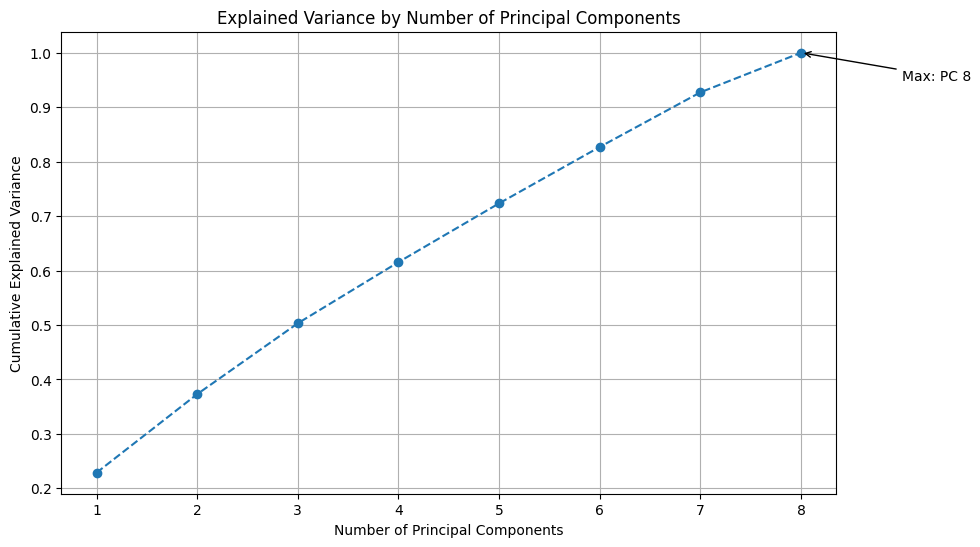

Principal Component 1: 0.2287 cumulative explained variance
Principal Component 2: 0.3729 cumulative explained variance
Principal Component 3: 0.5031 cumulative explained variance
Principal Component 4: 0.6154 cumulative explained variance
Principal Component 5: 0.7234 cumulative explained variance
Principal Component 6: 0.8270 cumulative explained variance
Principal Component 7: 0.9273 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [13]:
# Assume df is your dataframe

# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()

# Printing explained variance ratios
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Choose the number of components that explain most of the variance
n_components = max_index + 1

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# # Initializing and training the XGBoost model
# xgb_model = XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)

# # Making predictions
# y_pred = xgb_model.predict(X_test)

# # Evaluating the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'XGBoost Accuracy: {accuracy:.4f}')
# print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

# --- XGBoost Classifier ---
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=10)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_metrics = {
    'Accuracy': accuracy_score(y_test, xgb_y_pred),
    'Precision': precision_score(y_test, xgb_y_pred),
    'Recall': recall_score(y_test, xgb_y_pred),
    'F1 Score': f1_score(y_test, xgb_y_pred)
}

In [15]:
# --- Logistic Regression ---
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)
logistic_metrics = {
    'Accuracy': accuracy_score(y_test, logistic_y_pred),
    'Precision': precision_score(y_test, logistic_y_pred),
    'Recall': recall_score(y_test, logistic_y_pred),
    'F1 Score': f1_score(y_test, logistic_y_pred)
}

# --- Decision Tree Classifier ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_metrics = {
    'Accuracy': accuracy_score(y_test, dt_y_pred),
    'Precision': precision_score(y_test, dt_y_pred),
    'Recall': recall_score(y_test, dt_y_pred),
    'F1 Score': f1_score(y_test, dt_y_pred)
}

In [16]:
# --- Random Forest Classifier ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_y_pred),
    'Precision': precision_score(y_test, rf_y_pred),
    'Recall': recall_score(y_test, rf_y_pred),
    'F1 Score': f1_score(y_test, rf_y_pred)
}

In [22]:
from sklearn.svm import LinearSVC
# --- Support Vector Machine (SVM) ---
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_metrics = {
    'Accuracy': accuracy_score(y_test, svm_y_pred),
    'Precision': precision_score(y_test, svm_y_pred),
    'Recall': recall_score(y_test, svm_y_pred),
    'F1 Score': f1_score(y_test, svm_y_pred)
}

In [23]:
# Creating a results DataFrame to compare all models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'XGBoost', 'Random Forest', 'Decision Tree'],
    'Accuracy': [logistic_metrics['Accuracy'], svm_metrics['Accuracy'], xgb_metrics['Accuracy'], rf_metrics['Accuracy'], dt_metrics['Accuracy']],
    'Precision': [logistic_metrics['Precision'], svm_metrics['Precision'], xgb_metrics['Precision'], rf_metrics['Precision'], dt_metrics['Precision']],
    'Recall': [logistic_metrics['Recall'], svm_metrics['Recall'], xgb_metrics['Recall'], rf_metrics['Recall'], dt_metrics['Recall']],
    'F1 Score': [logistic_metrics['F1 Score'], svm_metrics['F1 Score'], xgb_metrics['F1 Score'], rf_metrics['F1 Score'], dt_metrics['F1 Score']]
})

# Displaying the results
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.956942   0.854647  0.625218  0.722148
1                  SVM  0.957358   0.886033  0.600813  0.716066
2              XGBoost  0.961050   0.927065  0.613016  0.738020
3        Random Forest  0.962663   0.904110  0.651947  0.757596
4        Decision Tree  0.942642   0.679234  0.680418  0.679826


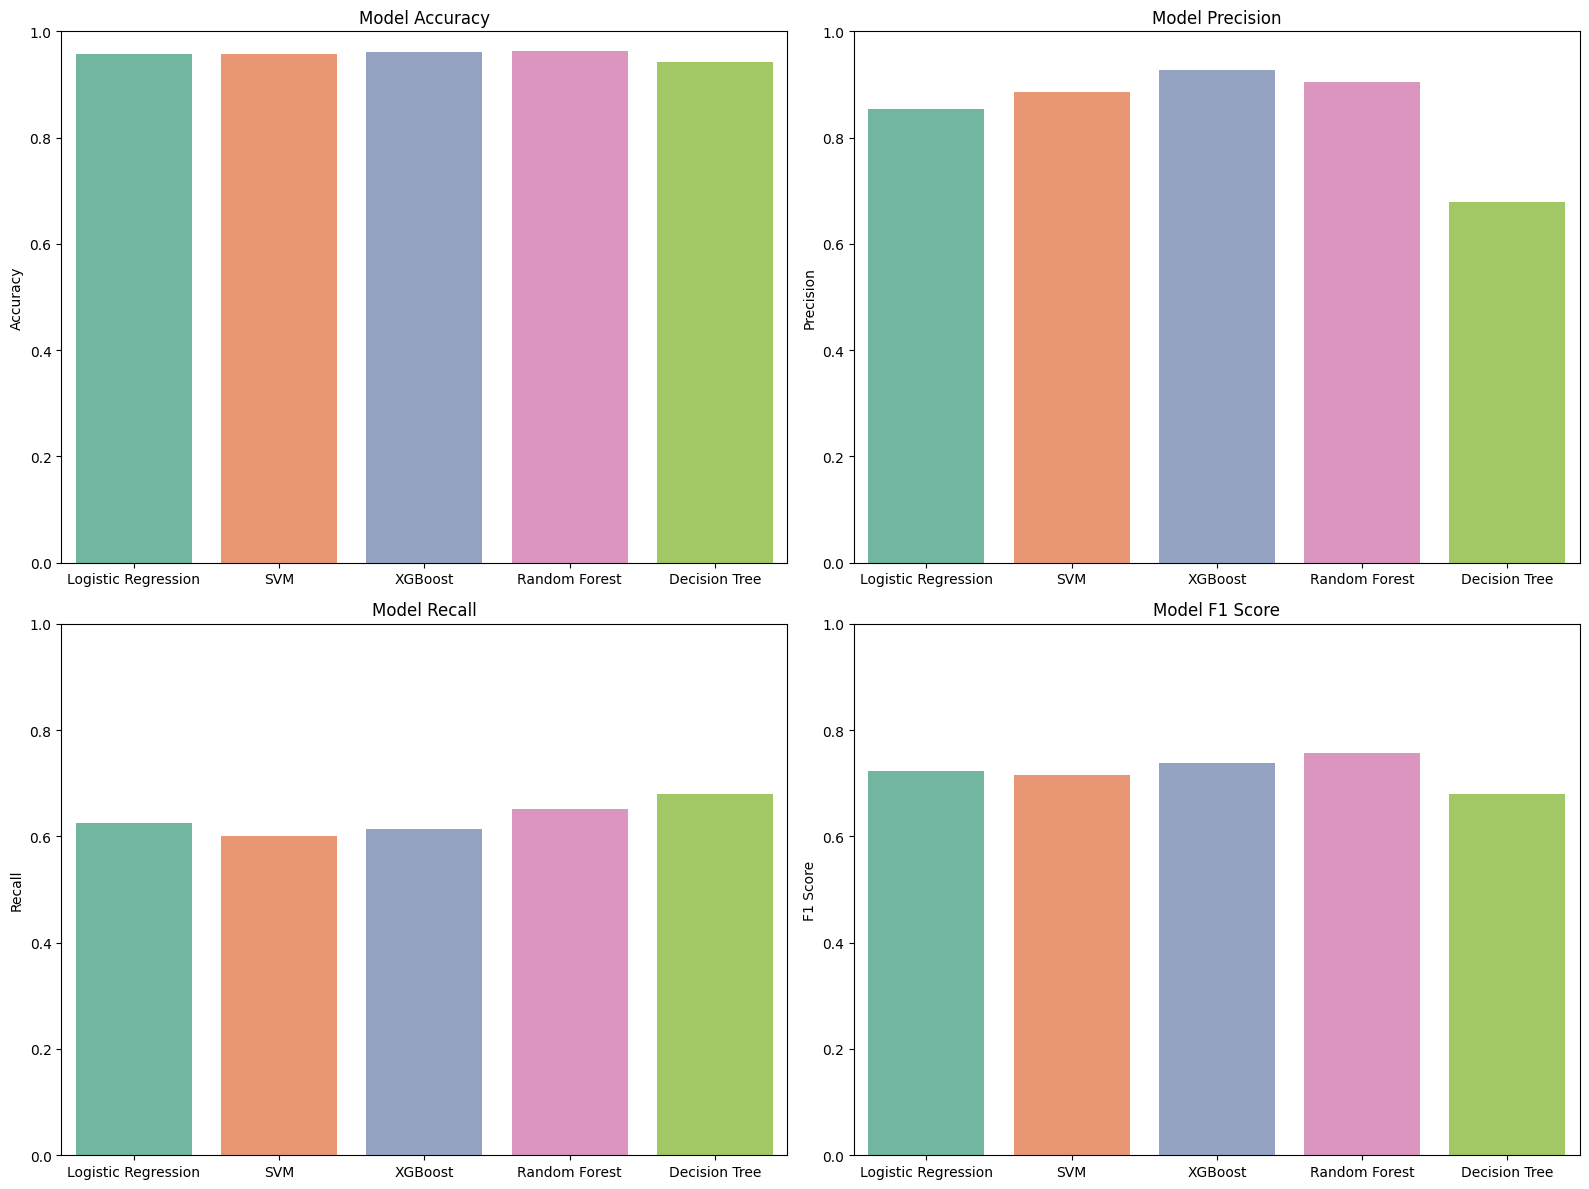

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 构建模型评估结果表，包含所有五个模型
results = pd.DataFrame([
    {'Model': 'Logistic Regression', **logistic_metrics},
    {'Model': 'SVM', **svm_metrics},
    {'Model': 'XGBoost', **xgb_metrics},
    {'Model': 'Random Forest', **rf_metrics},
    {'Model': 'Decision Tree', **dt_metrics}
])

# 定义评估指标
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# 设置画布大小
plt.figure(figsize=(16, 12))

# 绘制每个指标的条形图
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=results, palette='Set2')
    plt.title(f'Model {metric}')
    plt.ylim(0, 1)  # 设置y轴范围为 [0, 1]
    plt.xlabel('')
    plt.ylabel(metric)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

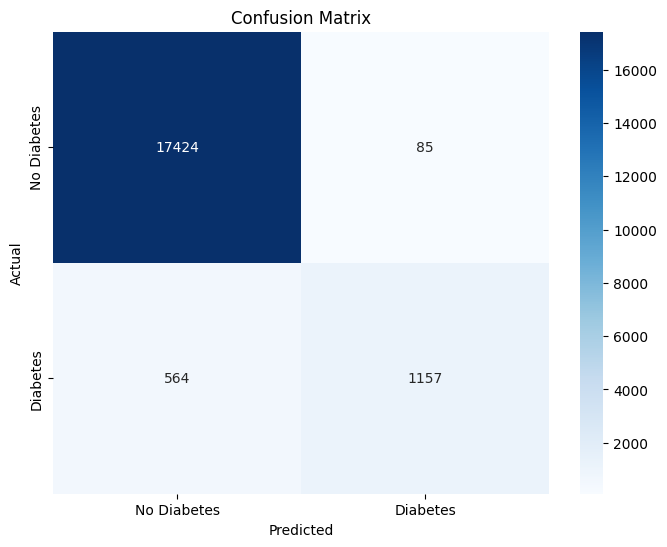

In [ ]:
# Compute the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [ ]:
# Prepare custom data
custom_data = [
    [1, 45, 0, 0, 1, 25.6, 6.5, 110],
    [0, 35, 1, 0, 0, 28.2, 7.2, 130],
    [1, 55, 1, 1, 1, 31.4, 8.0, 150],
    [0, 42, 0, 1, 0, 26.9, 7.0, 120],
    [1, 50, 1, 0, 1, 29.7, 7.8, 140]
]

# Convert to pandas DataFrame
custom_df = pd.DataFrame(custom_data, columns=features)

# Standardize the custom data
custom_X = scaler.transform(custom_df[features])

# Apply PCA transformation
custom_X_pca = pca.transform(custom_X)

# Make predictions using the trained XGBoost model
custom_predictions = xgb_model.predict(custom_X_pca)

# Print the predictions
for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(f"Person {i+1} is not predicted to have diabetes.")
    else:
        print(f"Person {i+1} is predicted to have diabetes.")

Person 1 is not predicted to have diabetes.
Person 2 is predicted to have diabetes.
Person 3 is predicted to have diabetes.
Person 4 is not predicted to have diabetes.
Person 5 is predicted to have diabetes.


In [ ]:
# # 训练完模型之后
# from sklearn.ensemble import RandomForestClassifier  # 举例
# import joblib

# # 假设你的模型变量名是 `diabetes_model`
# diabetes_model = RandomForestClassifier()
# diabetes_model.fit(X_train, y_train)

# # 保存模型
# joblib.dump(diabetes_model, 'diabetes_model.pkl')
# print("模型已保存到 diabetes_model.pkl")

In [ ]:
import joblib

joblib.dump(encoders, 'DiabetesEncoders.pkl')            # 🔹 保存所有编码器到一个文件
joblib.dump(scaler, 'DiabetesScaler.pkl')
joblib.dump(pca, 'DiabetesPCA.pkl')
joblib.dump(xgb_model, 'DiabetesModel.pkl')

print("✅ 已保存：DiabetesEncoders.pkl, DiabetesScaler.pkl, DiabetesPCA.pkl, DiabetesModel.pkl")


✅ 已保存：DiabetesEncoders.pkl, DiabetesScaler.pkl, DiabetesPCA.pkl, DiabetesModel.pkl
